In [5301]:
#on command prompt - python.exe -m pip install --upgrade pip

In [5302]:
#pip install pandas
#pip install numpy
#!pip install scikit-learn

In [5303]:
#!pip install regex
#!pip install openpyxl
#!pip install missingno

In [5304]:
#pip install --upgrade statsmodels

# 1. Importing Libraries

In [5305]:
import os
import numpy as np
import pandas as pd
import ast
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno

import regex as re

# 2. Reading the data

In [5306]:
PROJECT_DIR = r"C:\Users\ABC\Desktop\bhushan\magicbricks.com\mg_project\data"

In [5307]:
def get_data(name,col_range):
    file_name = f"{name}.csv"
    file_path = os.path.join(PROJECT_DIR, file_name)
    return pd.read_csv(file_path,usecols=col_range,low_memory=False)

In [5308]:
mg_first100 = get_data("f_original magicbricks cleaned 12022 data",col_range = range(100))
mg_nxt100 = get_data("f_original magicbricks cleaned 12022 data",col_range=range(100,200))
mg_last90 = get_data("f_original magicbricks cleaned 12022 data",col_range=range(200,290))

In [5309]:
print(mg_first100.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12022 entries, 0 to 12021
Data columns (total 100 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       12022 non-null  object 
 1   @type                    12022 non-null  object 
 2   @id                      12022 non-null  object 
 3   url                      12022 non-null  object 
 4   numberOfRooms            11913 non-null  float64
 5   image                    11092 non-null  object 
 6   name                     12022 non-null  object 
 7   geo                      11546 non-null  object 
 8   potentialAction          12022 non-null  object 
 9   address                  12022 non-null  object 
 10  PRICE                    12021 non-null  object 
 11  BHK_Type                 11912 non-null  object 
 12  Area                     9479 non-null   object 
 13  property_loc             11970 non-null  object 
 14  locality_URL         

In [5310]:
print(mg_nxt100.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12022 entries, 0 to 12021
Data columns (total 100 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   liv_Places of Interest              10714 non-null  object 
 1   BB_beds                             3503 non-null   float64
 2   BB_baths                            5019 non-null   float64
 3   BB_covered-parking                  1994 non-null   float64
 4   BB_unfurnished                      0 non-null      float64
 5   many_Carpet Area                    5404 non-null   object 
 6   many_Developer                      3832 non-null   object 
 7   many_Project                        4287 non-null   object 
 8   many_Transaction type               6742 non-null   object 
 9   many_Status                         4630 non-null   object 
 10  many_Lifts                          2624 non-null   float64
 11  many_Furnished Status               6502

In [5311]:
print(mg_last90.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12022 entries, 0 to 12021
Data columns (total 90 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   4 BHK Flat                    856 non-null    object 
 1   AP_Tower                      339 non-null    object 
 2   leftmany_Carpet Area          4749 non-null   object 
 3   Tourist Spot_2                1051 non-null   object 
 4   AM_12511                      155 non-null    object 
 5   MD_Age of Construction        10327 non-null  object 
 6   BB_balcony                    1443 non-null   float64
 7   many_Age of Construction      2615 non-null   object 
 8   leftBB_balcony                1644 non-null   float64
 9   leftmany_Age of Construction  1326 non-null   object 
 10  AM_12579                      100 non-null    object 
 11  BB_balconies                  1653 non-null   float64
 12  leftBB_balconies              1364 non-null   float64
 13  A

In [5312]:
mg = get_data("f_original magicbricks cleaned 12022 data",col_range=range(290))

In [5313]:
#create a copy of original dataframe
df=mg.copy()

In [5314]:
df.shape

(12022, 290)

In [5315]:
#make all values and column name in lowercase
df.columns = df.columns.str.lower()  # Convert column names to lowercase
df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)  # Convert string values to lowercase

C:\Users\ABC\AppData\Local\Temp\ipykernel_7772\2870125810.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)  # Convert string values to lowercase


In [5316]:
#check duplicate rows
print("Number of duplicate rows:", np.sum(df.duplicated()))

Number of duplicate rows: 0


In [5317]:
#delete column which have all nan values
df=df.dropna(how='all',axis=1)

In [5318]:
df.shape

(12022, 282)

In [5319]:
df.isnull().sum()

id                                        0
@type                                     0
@id                                       0
url                                       0
numberofrooms                           109
image                                   930
name                                      0
geo                                     476
potentialaction                           0
address                                   0
price                                     1
bhk_type                                110
area                                   2543
property_loc                             52
locality_url                             58
emi                                       3
md_price breakup                          1
md_booking amount                      4654
md_address                                1
md_furnishing                            46
md_flooring                            4532
md_loan offered                        5394
md_water availability           

### Observation1

- Dataset contains 12022 rows and 282 features.  
- 282 columns, so it needs to be shortened.  
- Data types of some features are not appropriate.  
- Features have missing values.

-  compare and keep only one from this -> bb_baths,leftbb_baths,bb_bath,leftbb_bath
-  comapre and keep only one from this -> 'bb_covered-parking','leftbb_covered-parking','many_car parking','leftmany_car parking'
-  compare and keep only one from this -> 'many_developer','leftmany_developer','ap_buildr'
-  compare and keep only one from this -> ap_pjt_name,many_project,leftmany_project
-  compare and keep only one from this -> 'md_furnishing','bb_unfurnished','many_furnished status','leftbb_unfurnished','leftmany_furnished status','bb_semi-furnished','leftbb_semi-furnished','bb_furnished','leftbb_furnished'
-  work on 'price' column 
-  compare and keep only one from this -> 'many_carpet area','leftmany_carpet area'
-  compare and keep only one from this -> 'leftmany_super built-up area','many_super built-up area'
-  compare and keep only one from this -> 'many_transaction type','leftmany_transaction type'
-  compare and keep only one from this -> 'md_type of ownership', 'many_type of ownership' ,'leftmany_type of ownership'
-  compare and keep only one from this -> 'many_status', 'leftmany_status'
-  compare and keep only one from this -> 'many_lifts','md_lift','leftmany_lifts','many_lift','leftmany_lift'
-  compare and keep only one from this -> 'aboutpjt_total floors', 'md_floors allowed for construction','many_floor', 'leftmany_floor'
-  compare and keep only one from this -> 'md_age of construction', 'many_age of construction', 'leftmany_age of construction'
-  compare and keep only one from this -> 'bb_balcony', 'leftbb_balcony', 'bb_balconies','leftbb_balconies'
-  compare and keep only one from this -> 'md_additional rooms', 'leftmany_additional rooms', 'many_additional rooms'
-  compare and keep only one from this -> 'leftmany_facing', 'many_facing'
-  compare and make separate column for tower and unit -> 'ap_tower & unit','aboutpjt_total units','aboutpjt_total towers','ap_tower','ap_unit'
-  compare and keep only one from this -> 'numberofrooms','bb_beds','leftbb_beds','bb_bed','leftbb_bed'

### Observation 2

- geo - longitude and latitude  
- potentialAction - seller:[organization,person,realestateagent] , make 3 columns like this
-  some properties are from navimumbai written in 'address' column and even then also in 'property_loc' column they written mumbai so find that and change that in  'property_loc' column and then delete "address" column
-  combine all 'am' columns together in list
- combine 'educational institute' - 'educational institute_1','educational institute_2','educational institute_3','educational institute_4','educational institute_5'
- combine 'transportation hub' - 'transportation hub_1','transportation hub_2','transportation hub_3','transportation hub_4','transportation hub_5'
- combine 'shopping centre' - 'shopping centre_1','shopping centre_2','shopping centre_3','shopping centre_4','shopping centre_5'
- combine 'commercial hub_1','commercial hub_2','commercial hub_3','commercial hub_4','commercial hub_5'
- combine 'hospital_1','hospital_2','hospital_3','hospital_4','hospital_5'
- combine 'tourist spot_1','tourist spot_2','tourist spot_3','tourist spot_4'
- work on md_overlooking
- make categories like flat and apartment from 'name' column
- emi column :convert all values in lakh
- aboutpjt_project size : convert all in sqft

#### drop this columns :
'@id','@type','bhk_type' ,'locality_url','md_booking amount','md_loan offered','md_water availability','ap_price','ap_price per sqft','ap_configuration','ap_pjt_url','ap_ratings','ap_reviews_by','headings_with_ratings','aboutpjt_bhk','2 bhk flat','locality_url_review','liv_environment','liv_commuting','liv_places of interest','md_status of electricity','3 bhk flat','1 bhk flat','studio apartment','4 bhk flat','5 bhk flat','md_landmarks', 'multistorey apartment', '3 bhk villa', '4 bhk villa', 'residential plot', '2 bhk builder', '3 bhk builder','4 bhk penthouse','5 bhk penthouse', 'md_authority approval','6 bhk flat','rent','commercial office space','3 bhk penthouse','md_rera id','aboutpjt_launch date'

- md_flooring - give weightage to each and sum it, eg:[marble,ceramic] = [1,2] = 3

# 3.1 Bath

#### Observation
 - columns :'bb_baths','leftbb_baths','bb_bath','leftbb_bath'
 - combine all in newly created column
 - and then keep only one bath value
 - make dtype as float 

In [5320]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_colwidth',None)

In [5321]:
df[['bb_baths','leftbb_baths','bb_bath','leftbb_bath']].head(2)

,bb_baths,leftbb_baths,bb_bath,leftbb_bath
0,2.0,NaN,NaN,NaN
1,NaN,3.0,NaN,NaN


In [5322]:
#'bb_baths','leftbb_baths','bb_bath','leftbb_bath'
#join all this columns in one column 

df['bath'] = df['bb_baths'].astype(str) + "," + df['leftbb_baths'].astype(str) + "," + df['bb_bath'].astype(str) + "," + df['leftbb_bath'].astype(str)

In [5323]:
df.head(2)

,id,@type,@id,url,numberofrooms,image,name,geo,potentialaction,address,...,am_1404159,am_12516,am_12580,commercial office space,am_12513,am_12550,am_12552,am_12553,3 bhk penthouse,bath
0,cardid69429251,apartment,https://www.magicbricks.com/propertydetails/2-bhk-635-sq-ft-multistorey-apartment-for-sale-pokhran-road-in-thane&id=4d423639343239323531,https://www.magicbricks.com/propertydetails/2-bhk-635-sq-ft-multistorey-apartment-for-sale-pokhran-road-in-thane&id=4d423639343239323531,2.0,https://img.staticmb.com/mbimages/project/photo_h310_w462/2023/04/14/project-photo-6-raymond-realty-ten-x-habitat-thane-5124557_1200_1600_310_462.jpg,"2 bhk flat for sale in tenx habitat raymond realty, pokhran road, thane","{'@type': 'geocoordinates', 'latitude': '19.20777713', 'longitude': '72.96747907'}","{'@type': 'buyaction', 'seller': {'@type': 'organization', 'name': 'raymond realty'}}","{'@type': 'postaladdress', 'addresslocality': 'pokhran road', 'addressregion': 'thane', 'addresscountry': 'in'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"2.0,nan,nan,nan"
1,cardid69427147,apartment,https://www.magicbricks.com/propertydetails/3-bhk-1905-sq-ft-multistorey-apartment-for-sale-kharghar-in-navi-mumbai&id=4d423639343237313437,https://www.magicbricks.com/propertydetails/3-bhk-1905-sq-ft-multistorey-apartment-for-sale-kharghar-in-navi-mumbai&id=4d423639343237313437,3.0,https://img.staticmb.com/mbimages/project/photo_h310_w462/project-photo-28-sai-world-empire-navi-mumbai-5088768_600_800_310_462.jpg,"3 bhk flat for sale in paradise sai world empire, kharghar, navi mumbai","{'@type': 'geocoordinates', 'latitude': '19.08060457', 'longitude': '73.07393855'}","{'@type': 'buyaction', 'seller': {'@type': 'realestateagent', 'name': 'aristo real estate consultants'}}","{'@type': 'postaladdress', 'addresslocality': 'kharghar', 'addressregion': 'navi mumbai', 'addresscountry': 'in'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"nan,3.0,nan,nan"


In [5324]:
#from this : 2.0,nan,nan,nan to this: 2.0 
#and if all values like this nan,nan,nan,nan then keep one nan 
df['bath'] = df['bath'].apply(
    lambda x: None if all(item.strip() == 'nan' for item in x.split(',')) else re.sub(r'(,?nan)+', '', x).strip(',')
)

In [5325]:
#chk if any row have more than one value or not
#eg: values will be like this: 2.0,3.0 ,  so to detect this I use  ',' here to detect such rows 
df['bath'].str.contains(',', na=False).sum()

np.int64(0)

In [5326]:
df['bath'].value_counts()

bath
2.0     6577
3.0     2487
1.0     1740
4.0      781
5.0      279
6.0       88
7.0       11
10.0       7
8.0        7
9.0        1
Name: count, dtype: int64

In [5327]:
df['bath'].dtype

dtype('O')

In [5328]:
df['bath'] = pd.to_numeric(df['bath'], errors='coerce')

In [5329]:
df['bath'].dtype

dtype('float64')

In [5330]:
#nan values in bath column 
df['bath'].isna().sum()

np.int64(44)

In [5331]:
# Drop columns : 'bb_baths','leftbb_baths','bb_bath','leftbb_bath'
df = df.drop(['bb_baths','leftbb_baths','bb_bath','leftbb_bath'],axis=1)

# 3.2 Parking

comapre and keep only one from this -> 'bb_covered-parking','leftbb_covered-parking','many_car parking','leftmany_car parking'

#### Observation
  - 4 columns :'bb_covered-parking','leftbb_covered-parking','many_car parking','leftmany_car parking'
  - some columns have similar data
  - max value is the correct one
  - also some columns values are like '1 Covered, 3 Open' so add only int from them so we get 4 
  - combine all columns and keep max value from them in newly created 'parking' column
  - convert into float

In [5332]:
df[['bb_covered-parking','leftbb_covered-parking','many_car parking','leftmany_car parking']].head(5)

,bb_covered-parking,leftbb_covered-parking,many_car parking,leftmany_car parking
0,1.0,NaN,1 covered,NaN
1,NaN,1.0,NaN,1 covered
2,1.0,NaN,1 covered,NaN
3,NaN,NaN,NaN,NaN
4,1.0,NaN,1 covered,NaN


In [5333]:
#from 'leftmany_car parking' keep only int values  
#eg: if like this :1 Covered, 3 Open then form this we get :4
df['leftmany_car parking'] = df['leftmany_car parking'].apply(lambda x: None if pd.isna(x) else sum(map(int, re.findall(r'\d+', str(x)))))

In [5334]:
#from 'many_Car parking' keep only int values
#eg: if like this :1 Covered, 3 Open then form this we get :4
df['many_car parking'] = df['many_car parking'].apply(lambda x: None if pd.isna(x) else sum(map(int, re.findall(r'\d+', str(x)))))

In [5335]:
#make 1 column in that combine all this below column values
#''bb_covered-parking','leftbb_covered-parking','many_car parking','leftmany_car parking'

df['parking'] = df['bb_covered-parking'].astype(str) + "," + df['leftbb_covered-parking'].astype(str) + "," + df['leftmany_car parking'].astype(str) + "," + df['many_car parking'].astype(str)

In [5336]:
#make new column for parking in that take only that values which are max in this below 4 columns 
#'bb_covered-parking','leftbb_covered-parking','many_car parking','leftmany_car parking'
#if all values are nan then keep nan only 

df['parking'] = df['parking'].apply(
    lambda x: None if all(item.strip() == 'nan' for item in x.split(',')) 
    else max([float(item) for item in x.split(',') if item.strip() not in ['nan', '']])
)



#### Observation
  - lesser than 12 car parking for 1 flat 
  - more than 12 parking for 1 flat then delete make that 1 only  
    eg: 50 open parking so make this 1 only
  - above 2 not possible

In [5337]:
df['parking'].value_counts()

parking
1.0      3973
2.0      1352
3.0       243
4.0        83
5.0        21
10.0       10
6.0         8
12.0        3
100.0       3
22.0        2
9.0         2
8.0         2
50.0        2
34.0        2
102.0       2
15.0        2
104.0       1
16.0        1
18.0        1
65.0        1
188.0       1
403.0       1
813.0       1
23.0        1
122.0       1
603.0       1
36.0        1
420.0       1
203.0       1
27.0        1
44.0        1
45.0        1
508.0       1
20.0        1
858.0       1
40.0        1
501.0       1
30.0        1
11.0        1
504.0       1
402.0       1
512.0       1
13.0        1
Name: count, dtype: int64

#### Observation
  - more than 13 parking for single flat is not possible hence make them 'nan'
  - assign parking is not possible for below ID's hence make nan for them also ['cardid27836801' 'cardid48504695' 'cardid54247801' 'cardid63926535'
 'cardid70165891' 'cardid70404005' 'cardid71077363' 'cardid71669157'
 'cardid71832843' 'cardid72076743' 'cardid72520475' 'cardid72662033'
 'cardid72870079' 'cardid72884903' 'cardid72943753' 'cardid72963631'
 'cardid73073955' 'cardid73082695' 'cardid73099819' 'cardid73226903']

- make dtype as float

In [5338]:
#None for the values which are more than 13 in parking column 
df['parking'] = df['parking'].apply(lambda x: None if x>=13 else x)

In [5339]:
#make parking=nan for the below mention ID's
ids_to_update = [
    'cardid27836801', 'cardid48504695', 'cardid54247801', 'cardid63926535', 
    'cardid70165891', 'cardid70404005', 'cardid71077363', 'cardid71669157', 
    'cardid71832843', 'cardid72076743', 'cardid72520475', 'cardid72662033', 
    'cardid72870079', 'cardid72884903', 'cardid72943753', 'cardid72963631', 
    'cardid73073955', 'cardid73082695', 'cardid73099819', 'cardid73226903'
]

# Update 'parking' to NaN for rows where 'ID' matches
df.loc[df['id'].isin(ids_to_update), 'parking'] = None

In [5340]:
df['parking'].isna().sum()

np.int64(6344)

In [5341]:
df['parking'].dtype

dtype('float64')

In [5342]:
df['parking'] = pd.to_numeric(df['parking'], errors='coerce')

In [5343]:
df['parking'].dtype

dtype('float64')

In [5344]:
# Drop columns : 'bb_covered-parking','leftbb_covered-parking','many_car parking','leftmany_car parking'
df = df.drop(['bb_covered-parking','leftbb_covered-parking','many_car parking','leftmany_car parking'],axis=1)

# 3.3 Builder 

#### Observation 
 - have this many columns : 'many_developer','leftmany_developer','ap_buildr'
 - combine them and keep only one value from it else keep nan
 - dtype is object

In [5345]:
#chk any ',' available before splitting in all this columns : 'many_developer','leftmany_developer','ap_buildr'
df['ap_buildr'].str.contains(',', na=False).sum()

np.int64(0)

In [5346]:
#combine columns 
df['builder'] = df['many_developer'].astype(str) + "," + df['leftmany_developer'].astype(str) + "," + df['ap_buildr'].astype(str)

In [5347]:
#keep if builder is available else keep nan
df['builder'] = df['builder'].apply(
    lambda x: None if all(item.strip() == 'nan' for item in x.split(',')) 
    else next((item.strip() for item in x.split(',') if item.strip() not in ['nan', '']), None)
)


In [5348]:
#drop columns : 'many_developer','leftmany_developer','ap_buildr'
df = df.drop(['many_developer','leftmany_developer','ap_buildr'],axis=1)

In [5349]:
#df13 = df[['id','url','name','price','md_Address','builder','ap_pjt_name','many_project','leftmany_project']]

#for observation make this excel
#df13.to_excel('chk13.xlsx')

In [5350]:
#chk if any row have more than one value or not
df['builder'].str.contains(',', na=False).sum()

np.int64(0)

### observation 

- same builders are written in various manner
- a&o realty,a and o realty,a & o realty ltd.
- adhiraj constructions and adhiraj constructions pvt. ltd.
- arihant superstructures ltd and arihant superstructures ltd.
- bharat infrastructure & engineering pvt. ltd. and bharat infrastructure and engineering
- bhoomi group,bhoomi,bhoomi properties
- choice group of companies and choice group
- darshan properties and darshan properties group
- dev land housing and dev land housing ltd.
- ecohomes and eco homes
- gundecha developers/ gundecha / gundecha developing milestone /gundecha group
- hiranandani communities / hiranandani constructions / hiranandani developers / hiranandani group / house of hiranandani
- k raheja realty/ k. raheja realty
- krishna enterprise / krishna enterprises
- l & t realty / l&t realty
- lodha / lodha group
- lok housing group / lok group
- lokhandwala builders / Lokhandwala Constructions / lokhandwala construction industries pvt. ltd. / lokhandwala group 
- lokhandwala infrastructure
- lotus logistic and developers / lotus logistics & developer pvt ltd
- neelam realtors / neelam realtors pvt. ltd.
- neelsidhi gloria / neelsidhi

In [5351]:
df['builder'].dtype

dtype('O')

# 3.4 project_name

#### Observation 
 - have this many columns : ap_pjt_name,many_project,leftmany_project
 - combine them and keep only one value from it else keep nan
 - dtype is object

In [5352]:
#chk any ',' available before splitting in all this columns :ap_pjt_name,many_project,leftmany_project
df['leftmany_project'].str.contains(',', na=False).sum()

np.int64(0)

In [5353]:
df['leftmany_project'].dtype

dtype('O')

In [5354]:
#combine columns 
df['project_name'] = df['ap_pjt_name'].astype(str) + "," + df['many_project'].astype(str) + "," + df['leftmany_project'].astype(str)

In [5355]:
#keep if project_name is available else keep nan
df['project_name'] = df['project_name'].apply(
    lambda x: None if all(item.strip() == 'nan' for item in x.split(',')) 
    else next((item.strip() for item in x.split(',') if item.strip() not in ['nan', '']), None)
)

In [5356]:
#df14 = df[['id','url','name','price','md_address','builder','project_name']]

#for observation make this excel
#df14.to_excel('chk14.xlsx')

In [5357]:
#chk if any row have more than one value or not
df['project_name'].str.contains(',', na=False).sum()

np.int64(0)

In [5358]:
# Drop columns : 'ap_pjt_name','many_project','leftmany_project'
df = df.drop(['ap_pjt_name','many_project','leftmany_project'],axis=1)

In [5359]:
df['project_name'].dtype

dtype('O')

# 3.5 furnish

#### Observation 
  - this many columns we have : 'md_furnishing','bb_unfurnished','many_furnished status','leftbb_unfurnished','leftmany_furnished status','bb_semi-furnished','leftbb_semi-furnished','bb_furnished','leftbb_furnished'
  - Already dropped these columns as they were empty: ['bb_unfurnished', 'leftbb_unfurnished', 'bb_semi-furnished', 'leftbb_semi-furnished', 'bb_furnished', 'leftbb_furnished'].
  - so now only to perform on this columns : ['md_furnishing','many_furnished status','leftmany_furnished status']
  - combine them and keep only one value
  - dtype is object

In [5360]:
#chk any ',' available before splitting in all this columns :'md_furnishing','many_furnished status','leftmany_furnished status'
df['leftmany_furnished status'].str.contains(',', na=False).sum()

np.int64(0)

In [5361]:
#df15 = df[['ID','url','name','PRICE','MD_Furnishing','many_Furnished Status','leftmany_Furnished Status']]

#for observation make this excel
#df15.to_excel('chk15.xlsx')

In [5362]:
#combine columns 
df['furnish'] = df['md_furnishing'].astype(str) + "," + df['many_furnished status'].astype(str) + "," + df['leftmany_furnished status'].astype(str)

In [5363]:
#keep if furnish is available else keep nan
df['furnish'] = df['furnish'].apply(
    lambda x: None if all(item.strip() == 'nan' for item in x.split(',')) 
    else next((item.strip() for item in x.split(',') if item.strip() not in ['nan', '']), None)
)

In [5364]:
df['furnish'].value_counts()

furnish
unfurnished       7553
semi-furnished    3234
furnished         1189
Name: count, dtype: int64

In [5365]:
#chk if any row have more than one value or not
df['furnish'].str.contains(',', na=False).sum()

np.int64(0)

In [5366]:
# Drop columns : ['MD_Furnishing','many_Furnished Status','leftmany_Furnished Status']
df = df.drop(['md_furnishing','many_furnished status','leftmany_furnished status'],axis=1)

In [5367]:
df['furnish'].dtype

dtype('O')

# 3.6 price

### Observation 
- some in Cr and some price in lakhs , have to convert all of them into cr
- only Cr and Lac values in column
- drop 'md_price breakup'
- drop row where price is missing 

In [5368]:
df['price'].head()

0    ₹1.80 cr
1    ₹2.37 cr
2    ₹1.80 cr
3    ₹1.64 cr
4    ₹1.26 cr
Name: price, dtype: object

In [5369]:
#df['price'].value_counts()

In [5370]:
#fetch price unit and actul_price is the price which is in Lac and cr 
df['price_unit'] = df['price'].str.split(' ').str[1]
df['actual_price'] = df['price'].str.split(' ').str[0].str.replace('₹','').astype('float')

In [5371]:
df['price_unit'].value_counts()

price_unit
cr     8740
lac    3281
Name: count, dtype: int64

In [5372]:
#convert lac price into Cr
df['f_price'] = df.apply(
    lambda row: row['actual_price'] / 100 if row['price_unit'] == 'lac'
    else row['actual_price'],
    axis=1
)

In [5373]:
#f_price is in Cr
df['f_price'].head()

0    1.80
1    2.37
2    1.80
3    1.64
4    1.26
Name: f_price, dtype: float64

In [5374]:
#drop row where price is missing
df = df.dropna(subset=['f_price'])

In [5375]:
df['f_price'].isna().sum()

np.int64(0)

In [5376]:
# Drop columns : 'price'
df = df.drop(['price','price_unit','actual_price','md_price breakup'],axis=1)

# 3.7 carpet_area

#### Observation  
- The following columns are present: 'many_carpet area','leftmany_carpet area'.  
- carpet area is mentioned in sqft,kanal and sqm .
- create new column(carpet_area) for - Extract the initial numeric values else keep nan
- convert capret_area into float
- create new column(cost_per_sqft) for - rupees per area is also included at the end of each value,following the indian rupee symbol,extract that else keep nan
- convert cost_per_sqft into float
- create new column(area_unit) for - sqft,kanal and sqm are specified at the end of each value else keep nan
- checked in excel : If value are present in 'many_carpet area', they are not present in the 'leftmany_carpet area' column at the same time.

In [5377]:
#combine_first Update null elements with value in the same location in other.
df['area_work'] = df["many_carpet area"].combine_first(df["leftmany_carpet area"])

In [5378]:
df['area_work'].head(5)

0    635sqftsqftsqyrdsqmacrebighahectaremarlakanalbiswa1biswa2groundaankadamroodchatakkottahmarlacentperchgunthaarekathagajkillakuncham₹28,346/sqft
1                                                                                                                                               NaN
2    623sqftsqftsqyrdsqmacrebighahectaremarlakanalbiswa1biswa2groundaankadamroodchatakkottahmarlacentperchgunthaarekathagajkillakuncham₹28,892/sqft
3    702sqftsqftsqyrdsqmacrebighahectaremarlakanalbiswa1biswa2groundaankadamroodchatakkottahmarlacentperchgunthaarekathagajkillakuncham₹23,500/sqft
4    608sqftsqftsqyrdsqmacrebighahectaremarlakanalbiswa1biswa2groundaankadamroodchatakkottahmarlacentperchgunthaarekathagajkillakuncham₹20,724/sqft
Name: area_work, dtype: object

In [5379]:
#cross chk done 
# area column : Extract the initial numbers using a regex 
df["carpet_area"] = df["area_work"].apply(lambda x: float(re.match(r'([\d,\.]+)', x).group(1).replace(',', '')) if pd.notna(x) and re.match(r'^[\d,\.]+', x) else None)

In [5380]:
df['carpet_area'].head()

0    635.0
1      NaN
2    623.0
3    702.0
4    608.0
Name: carpet_area, dtype: float64

In [5381]:
df['carpet_area'].dtype

dtype('float64')

In [5382]:
df['carpet_area'].isna().sum()

np.int64(1868)

In [5383]:
#cross chk done
# area column : Extract the cost per sqft numbers using a regex 
df['cost_per_sqft'] = df['area_work'].str.extract(r'₹([\d,\.]+)')[0].str.replace(',', '').astype(float)

In [5384]:
df['cost_per_sqft'].head()

0    28346.0
1        NaN
2    28892.0
3    23500.0
4    20724.0
Name: cost_per_sqft, dtype: float64

In [5385]:
df['cost_per_sqft'].dtype

dtype('float64')

In [5386]:
df['cost_per_sqft'].isna().sum()

np.int64(1869)

In [5387]:
#cross chk done
#extract area_unit 
df['area_unit'] = df['area_work'].str.extract(r'/([^/]+)$')

In [5388]:
df['area_unit'].value_counts()

area_unit
sqft     10147
sqm          4
kanal        1
Name: count, dtype: int64

In [5389]:
df[df['area_unit']=='sqm'][['id','cost_per_sqft']]

,id,cost_per_sqft
6348,cardid54247801,112879.0
7258,cardid53926103,28289.0
9178,cardid72980775,30488.0
10168,cardid59087581,117073.0


#### Observation 
- from above for sqm unit data, the cost per unit is very high 1,12,879 and if convert it into sqft then it comes in lakhs which is not correct
- hence drop this 4 rows where unit of area is sqm
- also only one row in kanal unit hence drop that also 

In [5390]:
#drop rows where sqm and kanal is present
df = df[~df['area_unit'].isin(['sqm', 'kanal'])]

In [5391]:
df['area_unit'].value_counts()

area_unit
sqft    10147
Name: count, dtype: int64

In [5392]:
df.shape

(12016, 273)

In [5393]:
df[df['cost_per_sqft'].isna()].shape

(1869, 273)

#### Observation 

 - 1870 carpet area values are unavailable
 - from observation found out that the carpet area values which are missing for that corresponding this 'leftmany_super built-up area','many_super built-up area' column values are present
 - also when 'leftmany_super built-up area' values are present then its corresponding 'many_super built-up area' values are not present and vice versa
 - now this columns are super built up area and not the carpet area ,so have to convert them into carpet area as majority values i.e 10152 carpet area values are available


In [5394]:
#combine_first Update null elements with value in the same location in other.
df['super_build_area_work'] = df["leftmany_super built-up area"].combine_first(df["many_super built-up area"])

In [5395]:
df['super_build_area_work'].head(5)

0                                                                                                                                                NaN
1    1905sqftsqftsqyrdsqmacrebighahectaremarlakanalbiswa1biswa2groundaankadamroodchatakkottahmarlacentperchgunthaarekathagajkillakuncham₹12,441/sqft
2                                                                                                                                                NaN
3                                                                                                                                                NaN
4                                                                                                                                                NaN
Name: super_build_area_work, dtype: object

### Observation
- some super_build_area_work values have different units at the intial position and and the end

In [5396]:
#chk the units after intial digits 
df['initial_unit'] = df['super_build_area_work'].apply(lambda x: ''.join([char for char in str(x)[re.match(r'\d+', str(x)).end():] if char.isalpha()])[:4] if isinstance(x, str) else None)

In [5397]:
df['initial_unit'].value_counts() 

initial_unit
sqft    1833
sqms       4
sqyr       1
Name: count, dtype: int64

In [5398]:
#drop rows which has units : sqm and sqr (as there is only 5 rows) 
df = df[~df['initial_unit'].isin(['sqms', 'sqyr'])]

In [5399]:
df['initial_unit'].value_counts() 

initial_unit
sqft    1833
Name: count, dtype: int64

In [5400]:
#cross chk done 
# area column : Extract the initial numbers using a regex 
df["super_build_up_area"] = df["super_build_area_work"].apply(lambda x: float(re.match(r'([\d,\.]+)', x).group(1).replace(',', '')) if pd.notna(x) and re.match(r'^[\d,\.]+', x) else None)

In [5401]:
df['super_build_up_area'].head()

0       NaN
1    1905.0
2       NaN
3       NaN
4       NaN
Name: super_build_up_area, dtype: float64

In [5402]:
df['super_build_up_area'].dtype

dtype('float64')

In [5403]:
df['super_build_up_area'].isna().sum()

np.int64(10178)

In [5404]:
#cross chk done
# area column : Extract the cost per sqft numbers using a regex 
df['super_build_up_cost_per_sqft'] = df['super_build_area_work'].str.extract(r'₹([\d,\.]+)')[0].str.replace(',', '').astype(float)

In [5405]:
df['super_build_up_cost_per_sqft'].head()

0        NaN
1    12441.0
2        NaN
3        NaN
4        NaN
Name: super_build_up_cost_per_sqft, dtype: float64

In [5406]:
df['super_build_up_cost_per_sqft'].dtype

dtype('float64')

In [5407]:
df['super_build_up_cost_per_sqft'].isna().sum()

np.int64(10178)

In [5408]:
#cross chk done
#extract area_unit 
df['super_built_up_area_unit'] = df['super_build_area_work'].str.extract(r'/([^/]+)$')

In [5409]:
df['super_built_up_area_unit'].value_counts()

super_built_up_area_unit
sqft    1833
Name: count, dtype: int64

### Observation 

 - now I make one column f_area only which has this both carpet_area and super_build_up_area
 - similarly I make one column f_costpersqft which has both this  cost_per_sqft and super_build_up_cost_per_sqft
 - combine super_built_up_area_unit and area_unit

In [5410]:
#combine_first Update null elements with value in the same location in other.
df['f_area'] = df["carpet_area"].combine_first(df["super_build_up_area"])

In [5411]:
#combine_first Update null elements with value in the same location in other.
df['f_costpersqft'] = df["cost_per_sqft"].combine_first(df["super_build_up_cost_per_sqft"])

In [5412]:
#combine_first Update null elements with value in the same location in other.
df['f_area_unit'] = df["super_built_up_area_unit"].combine_first(df["area_unit"])

In [5413]:
df['f_area'] = df['f_area'].astype('float')
df['f_costpersqft'] = df['f_costpersqft'].astype('float')

In [5414]:
df['f_area'].isna().sum()

np.int64(30)

In [5415]:
df['f_costpersqft'].isna().sum()

np.int64(31)

In [5416]:
df['f_area_unit'].value_counts()

f_area_unit
sqft    11980
Name: count, dtype: int64

### Observation:

- the 32 flats f_area and f_costpersqft data not available
- But in the Area column there is sqft data ,after cross check the data is correct for that rows 

In [5417]:
df['dupli_f_area'] = np.where(
    pd.isna(df['f_area']) & pd.notna(df['area']),
    df['area'].str.extract(r'([\d,\.]+)')[0].str.replace(',', '').astype(float),
    None
)

In [5418]:
df['dupli_f_area'].value_counts()

dupli_f_area
1000.0    2
4200.0    2
1340.0    1
992.0     1
2600.0    1
533.0     1
2675.0    1
3100.0    1
2356.0    1
1175.0    1
2700.0    1
760.0     1
1665.0    1
1400.0    1
500.0     1
1412.0    1
1950.0    1
740.0     1
1258.0    1
1600.0    1
1442.0    1
3000.0    1
1580.0    1
Name: count, dtype: int64

In [5419]:
df['dupli_f_area'].value_counts().sum()

np.int64(25)

In [5420]:
df['dupli_f_area'].dtype

dtype('O')

In [5421]:
df['dupli_f_area_unit'] = np.where(
    pd.isna(df['f_area']) & pd.notna(df['area']),
    df['area'].str.extract(r'([a-zA-Z\-]+)$')[0],
    None
)

In [5422]:
#exp
df['dupli_f_area_unit'].value_counts()

dupli_f_area_unit
sq-ft    25
Name: count, dtype: int64

In [5423]:
df['dupli_f_area_unit'].dtype

dtype('O')

In [5424]:
df['dupli_f_price'] = df.apply(
    lambda row: row['f_price'] * (10**7) if pd.isna(row['f_area']) and pd.notna(row['area'])
    else None,
    axis=1
)

In [5425]:
df['dupli_f_price'].value_counts().sum()

np.int64(25)

In [5426]:
df['dupli_costpersqft'] = np.round(df['dupli_f_price'].astype('float') / df['dupli_f_area'].astype('float'), 2)

In [5427]:
df['dupli_costpersqft'].value_counts()

dupli_costpersqft
14328.36     1
48000.00     1
11088.71     1
90476.19     1
42307.69     1
100000.00    1
14071.29     1
63551.40     1
48387.10     1
25254.67     1
33191.49     1
32000.00     1
25740.74     1
17763.16     1
57057.06     1
32142.86     1
20000.00     1
66005.67     1
50000.00     1
30945.95     1
66136.72     1
41250.00     1
52011.10     1
128500.00    1
39240.51     1
Name: count, dtype: int64

In [5428]:
def update_values(df, update_cols, using_cols):
    for update_col, using_col in zip(update_cols, using_cols):
        df[update_col] = np.where(
            pd.isna(df['f_area']) & pd.notna(df['area']),
            df[using_col],
            df[update_col]
        )
    return df

# Define columns to update and corresponding columns to use
columns_to_update = ['f_costpersqft', 'f_area_unit', 'f_area']
using_columns = ['dupli_costpersqft', 'dupli_f_area_unit', 'dupli_f_area']

# Update the DataFrame
df = update_values(df, columns_to_update, using_columns)

In [5429]:
# Drop columns : 'many_Carpet Area','leftmany_Carpet Area','leftmany_Super Built-up Area','many_Super Built-up Area','Area' 
df = df.drop(['many_carpet area','leftmany_carpet area','leftmany_super built-up area','many_super built-up area','area'],axis=1)

In [5430]:
# Drop columns : 'area_work','carpet_area','cost_per_sqft','area_unit','super_build_area_work','super_build_up_area','super_build_up_cost_per_sqft','super_built_up_area_unit','dupli_f_area','dupli_f_area_unit','dupli_f_price','dupli_costpersqft'
df = df.drop(['area_work','carpet_area','cost_per_sqft','area_unit','initial_unit','super_build_area_work','super_build_up_area','super_build_up_cost_per_sqft','super_built_up_area_unit','dupli_f_area','dupli_f_area_unit','dupli_f_price','dupli_costpersqft','f_area_unit'],axis=1)


In [5431]:
df.head(2)

,id,@type,@id,url,numberofrooms,image,name,geo,potentialaction,address,...,am_12553,3 bhk penthouse,bath,parking,builder,project_name,furnish,f_price,f_area,f_costpersqft
0,cardid69429251,apartment,https://www.magicbricks.com/propertydetails/2-bhk-635-sq-ft-multistorey-apartment-for-sale-pokhran-road-in-thane&id=4d423639343239323531,https://www.magicbricks.com/propertydetails/2-bhk-635-sq-ft-multistorey-apartment-for-sale-pokhran-road-in-thane&id=4d423639343239323531,2.0,https://img.staticmb.com/mbimages/project/photo_h310_w462/2023/04/14/project-photo-6-raymond-realty-ten-x-habitat-thane-5124557_1200_1600_310_462.jpg,"2 bhk flat for sale in tenx habitat raymond realty, pokhran road, thane","{'@type': 'geocoordinates', 'latitude': '19.20777713', 'longitude': '72.96747907'}","{'@type': 'buyaction', 'seller': {'@type': 'organization', 'name': 'raymond realty'}}","{'@type': 'postaladdress', 'addresslocality': 'pokhran road', 'addressregion': 'thane', 'addresscountry': 'in'}",...,NaN,NaN,2.0,1.0,raymond realty,tenx habitat raymond realty,unfurnished,1.80,635.0,28346.0
1,cardid69427147,apartment,https://www.magicbricks.com/propertydetails/3-bhk-1905-sq-ft-multistorey-apartment-for-sale-kharghar-in-navi-mumbai&id=4d423639343237313437,https://www.magicbricks.com/propertydetails/3-bhk-1905-sq-ft-multistorey-apartment-for-sale-kharghar-in-navi-mumbai&id=4d423639343237313437,3.0,https://img.staticmb.com/mbimages/project/photo_h310_w462/project-photo-28-sai-world-empire-navi-mumbai-5088768_600_800_310_462.jpg,"3 bhk flat for sale in paradise sai world empire, kharghar, navi mumbai","{'@type': 'geocoordinates', 'latitude': '19.08060457', 'longitude': '73.07393855'}","{'@type': 'buyaction', 'seller': {'@type': 'realestateagent', 'name': 'aristo real estate consultants'}}","{'@type': 'postaladdress', 'addresslocality': 'kharghar', 'addressregion': 'navi mumbai', 'addresscountry': 'in'}",...,NaN,NaN,3.0,1.0,paradise group,paradise sai world empire,unfurnished,2.37,1905.0,12441.0


In [5432]:
#df41 = df[['ID','url','name','f_area','f_costpersqft','f_price','f_area_unit']]

#for observation make this excel

#df41.to_excel('chk41.xlsx')

### Obsevation
- on excel I have done this 
(f_Area * f_costpersqft)/10000000 from this I got price of the flat and I compare this with the actual price of theflat which is f_price and I found some properties khave cosiderable difference 
- note that I have chk that all in sqft only 
- so that properties ID is below 
'cardid70615879','cardid69687711','cardid71143703','cardid72821117','cardid66762427','cardid72819785'

In [5433]:
df.shape

(12011, 266)

In [5434]:
df['f_area'].head()

0     635.0
1    1905.0
2     623.0
3     702.0
4     608.0
Name: f_area, dtype: object

In [5435]:
df['f_price'].head()

0    1.80
1    2.37
2    1.80
3    1.64
4    1.26
Name: f_price, dtype: float64

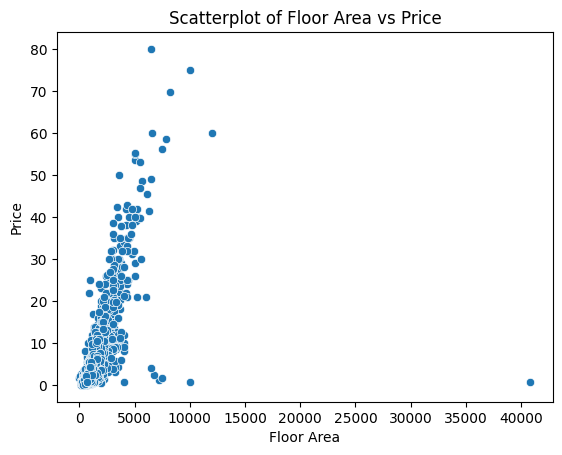

In [5436]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example
sns.scatterplot(x=df['f_area'], y=df['f_price'])
plt.xlabel('Floor Area')
plt.ylabel('Price')
plt.title('Scatterplot of Floor Area vs Price')
plt.show()

# property_type : New property, Resale, Rent, Other

### Observation
-  have this columns -> 'many_transaction type','leftmany_transaction type'
-  when 'many_Transaction type' values are present then its corresponding 'leftmany_Transaction type' values are not present and vice versa

In [5437]:
df[['many_transaction type','leftmany_transaction type']].head()

,many_transaction type,leftmany_transaction type
0,new property,NaN
1,NaN,new property
2,new property,NaN
3,new property,NaN
4,new property,NaN


In [5438]:
#combine_first Update null elements with value in the same location in other.
df['property_type'] = df["many_transaction type"].combine_first(df["leftmany_transaction type"])

In [5439]:
df['property_type'].value_counts()

property_type
resale          6823
new property    5177
other              7
rent               1
Name: count, dtype: int64

In [5440]:
df['property_type'].isna().sum()

np.int64(3)

In [5441]:
# Drop columns : 'many_Transaction type','leftmany_Transaction type'
df = df.drop(['many_transaction type','leftmany_transaction type'],axis=1)

In [5442]:
df.head(2)

,id,@type,@id,url,numberofrooms,image,name,geo,potentialaction,address,...,3 bhk penthouse,bath,parking,builder,project_name,furnish,f_price,f_area,f_costpersqft,property_type
0,cardid69429251,apartment,https://www.magicbricks.com/propertydetails/2-bhk-635-sq-ft-multistorey-apartment-for-sale-pokhran-road-in-thane&id=4d423639343239323531,https://www.magicbricks.com/propertydetails/2-bhk-635-sq-ft-multistorey-apartment-for-sale-pokhran-road-in-thane&id=4d423639343239323531,2.0,https://img.staticmb.com/mbimages/project/photo_h310_w462/2023/04/14/project-photo-6-raymond-realty-ten-x-habitat-thane-5124557_1200_1600_310_462.jpg,"2 bhk flat for sale in tenx habitat raymond realty, pokhran road, thane","{'@type': 'geocoordinates', 'latitude': '19.20777713', 'longitude': '72.96747907'}","{'@type': 'buyaction', 'seller': {'@type': 'organization', 'name': 'raymond realty'}}","{'@type': 'postaladdress', 'addresslocality': 'pokhran road', 'addressregion': 'thane', 'addresscountry': 'in'}",...,NaN,2.0,1.0,raymond realty,tenx habitat raymond realty,unfurnished,1.80,635.0,28346.0,new property
1,cardid69427147,apartment,https://www.magicbricks.com/propertydetails/3-bhk-1905-sq-ft-multistorey-apartment-for-sale-kharghar-in-navi-mumbai&id=4d423639343237313437,https://www.magicbricks.com/propertydetails/3-bhk-1905-sq-ft-multistorey-apartment-for-sale-kharghar-in-navi-mumbai&id=4d423639343237313437,3.0,https://img.staticmb.com/mbimages/project/photo_h310_w462/project-photo-28-sai-world-empire-navi-mumbai-5088768_600_800_310_462.jpg,"3 bhk flat for sale in paradise sai world empire, kharghar, navi mumbai","{'@type': 'geocoordinates', 'latitude': '19.08060457', 'longitude': '73.07393855'}","{'@type': 'buyaction', 'seller': {'@type': 'realestateagent', 'name': 'aristo real estate consultants'}}","{'@type': 'postaladdress', 'addresslocality': 'kharghar', 'addressregion': 'navi mumbai', 'addresscountry': 'in'}",...,NaN,3.0,1.0,paradise group,paradise sai world empire,unfurnished,2.37,1905.0,12441.0,new property


In [5443]:
df.shape

(12011, 265)

# ownership

### Observation
-  columns:  'md_type of ownership', 'many_type of ownership' ,'leftmany_type of ownership'
-  the values which are present in the 'md_type of ownership' column at the corresponding place values present in the 'many_type of ownership' and 'leftmany_type of ownership' also hence drop both this 'many_type of ownership' ,'leftmany_type of ownership' columns

1. **Freehold**: The owner has complete ownership of the property and the land it stands on, with no time limit. They can sell, transfer, or modify it without restrictions.

2. **Co-operative Society**: Ownership is collective. Residents form a society, and members own shares in it, giving them the right to reside in a unit but not outright ownership of the property.

3. **Leasehold**: The property is leased for a specific period (e.g., 99 years). Ownership remains with the lessor, and the lessee pays rent or a lease fee.

4. **Power of Attorney (POA)**: A legal authorization that allows an individual to act on behalf of the property owner. It’s often used for property transactions but doesn't equate to ownership.

In [5444]:
df['md_type of ownership'].value_counts()

md_type of ownership
freehold                5952
co-operative society    2044
leasehold                317
power of attorney         28
Name: count, dtype: int64

In [5445]:
df = df.rename(columns={'md_type of ownership': 'ownership'})

In [5446]:
# Drop columns : 'many_type of ownership' ,'leftmany_type of ownership'
df = df.drop(['many_type of ownership' ,'leftmany_type of ownership'],axis=1)

# status

### Observation
-  columns: 'many_status', 'leftmany_status'
-  when 'many_status' values are present then its corresponding 'leftmany_status' values are not present and vice versa

In [5447]:
#combine_first Update null elements with value in the same location in other.
df['status'] = df['many_status'].combine_first(df['leftmany_status'])

In [5448]:
df['status'].value_counts()

status
ready to move         7355
under construction     589
ongoing                  3
immediately              1
Name: count, dtype: int64

In [5449]:
df['status'] = df['status'].str.lower()

In [5450]:
df['status'].value_counts()

status
ready to move         7355
under construction     589
ongoing                  3
immediately              1
Name: count, dtype: int64

In [5451]:
df.head(2)

,id,@type,@id,url,numberofrooms,image,name,geo,potentialaction,address,...,bath,parking,builder,project_name,furnish,f_price,f_area,f_costpersqft,property_type,status
0,cardid69429251,apartment,https://www.magicbricks.com/propertydetails/2-bhk-635-sq-ft-multistorey-apartment-for-sale-pokhran-road-in-thane&id=4d423639343239323531,https://www.magicbricks.com/propertydetails/2-bhk-635-sq-ft-multistorey-apartment-for-sale-pokhran-road-in-thane&id=4d423639343239323531,2.0,https://img.staticmb.com/mbimages/project/photo_h310_w462/2023/04/14/project-photo-6-raymond-realty-ten-x-habitat-thane-5124557_1200_1600_310_462.jpg,"2 bhk flat for sale in tenx habitat raymond realty, pokhran road, thane","{'@type': 'geocoordinates', 'latitude': '19.20777713', 'longitude': '72.96747907'}","{'@type': 'buyaction', 'seller': {'@type': 'organization', 'name': 'raymond realty'}}","{'@type': 'postaladdress', 'addresslocality': 'pokhran road', 'addressregion': 'thane', 'addresscountry': 'in'}",...,2.0,1.0,raymond realty,tenx habitat raymond realty,unfurnished,1.80,635.0,28346.0,new property,under construction
1,cardid69427147,apartment,https://www.magicbricks.com/propertydetails/3-bhk-1905-sq-ft-multistorey-apartment-for-sale-kharghar-in-navi-mumbai&id=4d423639343237313437,https://www.magicbricks.com/propertydetails/3-bhk-1905-sq-ft-multistorey-apartment-for-sale-kharghar-in-navi-mumbai&id=4d423639343237313437,3.0,https://img.staticmb.com/mbimages/project/photo_h310_w462/project-photo-28-sai-world-empire-navi-mumbai-5088768_600_800_310_462.jpg,"3 bhk flat for sale in paradise sai world empire, kharghar, navi mumbai","{'@type': 'geocoordinates', 'latitude': '19.08060457', 'longitude': '73.07393855'}","{'@type': 'buyaction', 'seller': {'@type': 'realestateagent', 'name': 'aristo real estate consultants'}}","{'@type': 'postaladdress', 'addresslocality': 'kharghar', 'addressregion': 'navi mumbai', 'addresscountry': 'in'}",...,3.0,1.0,paradise group,paradise sai world empire,unfurnished,2.37,1905.0,12441.0,new property,under construction


In [5452]:
# Drop columns : 'many_Status', 'leftmany_Status'
df = df.drop(['many_status', 'leftmany_status'],axis=1)

# lift

### Observation
- columns: 'many_lifts','md_lift','leftmany_lifts','many_lift','leftmany_lift'
- combine and keep one value else nan

In [5453]:
# Combine values
df['lift'] = [list(values) for values in zip(df['many_lifts'], df['md_lift'], df['leftmany_lifts'], df['many_lift'], df['leftmany_lift'])]

In [5454]:
df['lift'] = df['lift'].apply(lambda row: next((val for val in row if not np.isnan(val)), None))

In [5455]:
df['lift'].value_counts()

lift
2.0     2393
3.0     1334
4.0     1139
1.0      631
5.0      385
6.0      306
8.0       85
7.0       78
10.0      69
9.0       56
Name: count, dtype: int64

In [5456]:
df['lift'].isna().sum()

np.int64(5535)

In [5457]:
df['lift'].dtype

dtype('float64')

In [5458]:
# Drop columns : 'many_lifts','md_lift','leftmany_lifts','many_lift','leftmany_lift'
df = df.drop(['many_lifts','md_lift','leftmany_lifts','many_lift','leftmany_lift'],axis=1)

In [5459]:
df.shape

(12011, 258)

# floor

### Observation

- columns: 'aboutpjt_total floors', 'aboutpjt_total floors', 'md_floors allowed for construction','many_floor', 'leftmany_floor'
- from column 'md_floors allowed for construction','many_floor', 'leftmany_floor': get how many floor building has
- when 'many_floor' values are present then its corresponding 'leftmany_floor' values are not present and vice versa
- from 'many_floor', 'leftmany_floor': get flat is on which floor
- drop 'aboutpjt_total floors' column as it is wrong information

In [5460]:
#combine_first Update null elements with value in the same location in other.
df['floor_work_1'] = df['many_floor'].combine_first(df['leftmany_floor'])

In [5461]:
df['floor_work_1'] = df['floor_work_1'].astype('str') 

In [5462]:
df['flat_on_floor'] = df['floor_work_1'].apply(
    lambda x: x.split('(')[0].strip() if '(' in str(x) else None
)


In [5463]:
df['flat_on_floor'].isna().sum()

np.int64(2308)

In [5464]:
df['total_floor'] = df['floor_work_1'].apply(
    lambda x: x.split('(')[1].strip() if '(' in str(x) else None
)

In [5465]:
df['total_floor'].isna().sum()

np.int64(2308)

In [5466]:
df['total_floor'] = df['total_floor'].str.extract(r'(\d+)').astype(float)

In [5467]:
df['total_floor'].value_counts()

total_floor
7.0     1031
4.0      578
22.0     534
20.0     366
23.0     325
14.0     317
15.0     305
8.0      284
12.0     278
16.0     270
21.0     258
3.0      249
18.0     230
30.0     224
5.0      223
40.0     215
13.0     206
6.0      202
17.0     167
9.0      149
36.0     146
35.0     144
10.0     144
24.0     142
19.0     134
27.0     132
25.0     131
28.0     130
11.0     123
45.0     123
29.0     118
50.0     115
42.0      97
31.0      95
33.0      94
32.0      89
37.0      83
38.0      81
34.0      76
60.0      75
39.0      75
26.0      67
2.0       51
41.0      48
61.0      47
44.0      46
51.0      45
46.0      44
55.0      41
43.0      38
47.0      36
49.0      35
48.0      30
65.0      29
78.0      28
63.0      24
62.0      23
67.0      22
53.0      22
52.0      21
54.0      21
69.0      21
68.0      20
57.0      19
58.0      18
1.0       17
72.0      17
77.0      16
56.0      16
75.0      14
70.0      14
64.0      12
66.0      11
59.0       6
76.0       6
81.0       4


In [5468]:
df['flat_on_floor'].value_counts()

flat_on_floor
3                 696
2                 689
1                 646
5                 641
4                 622
10                588
7                 564
6                 514
9                 391
12                370
8                 365
15                334
11                318
14                243
20                228
16                214
ground            202
18                201
13                176
17                144
21                144
19                131
22                126
25                121
23                 97
upper basement     82
30                 81
24                 77
27                 63
26                 58
28                 42
35                 38
40                 37
29                 35
33                 32
36                 31
32                 30
34                 30
50                 29
45                 26
lower basement     24
37                 21
38                 19
39                 18
42                

In [5469]:
df['flat_on_floor'] = df['flat_on_floor'].replace({'lower basement': -1, 'upper basement': -2,'ground':0})

In [5470]:
df['flat_on_floor'].value_counts()

flat_on_floor
3     696
2     689
1     646
5     641
4     622
10    588
7     564
6     514
9     391
12    370
8     365
15    334
11    318
14    243
20    228
16    214
0     202
18    201
13    176
17    144
21    144
19    131
22    126
25    121
23     97
-2     82
30     81
24     77
27     63
26     58
28     42
35     38
40     37
29     35
33     32
36     31
32     30
34     30
50     29
45     26
-1     24
37     21
38     19
39     18
42     17
41     17
31     17
44     13
47      9
48      8
60      8
46      7
43      7
52      7
62      6
68      6
55      6
57      5
56      4
51      4
70      3
58      3
53      3
49      3
54      3
66      3
61      2
75      1
73      1
71      1
65      1
Name: count, dtype: int64

In [5471]:
df['total_floor'] = np.where(
    pd.isna(df['total_floor']) & pd.notna(df['md_floors allowed for construction']),
    df['md_floors allowed for construction'],
    df['total_floor']
)

In [5472]:
df['total_floor'].isna().sum()

np.int64(2075)

In [5473]:
# Drop columns : 'Aboutpjt_Total Floors','floor_work_1','many_Floor','leftmany_Floor'
df = df.drop(['aboutpjt_total floors','floor_work_1','many_floor','leftmany_floor','md_floors allowed for construction'],axis=1)

In [5474]:
df['flat_on_floor'] =  df['flat_on_floor'].astype('float')

# construction 

### Observation 
- columns: 'md_age of construction', 'many_age of construction', 'leftmany_age of construction'
- when 'many_age of construction' values are present then its corresponding 'leftmany_age of construction' values are not present and vice versa

In [5475]:
#combine_first Update null elements with value in the same location in other.
df['construction_1'] = df['many_age of construction'].combine_first(df['leftmany_age of construction'])

In [5476]:
df['construction_1'].notna().sum()

np.int64(3938)

In [5477]:
df[df['construction_1'] == df['md_age of construction']][['construction_1','md_age of construction']].shape

(3936, 2)

### Observation
- almost all values are same between construction_1 and md_age of construction columns hence drop construction_1,because md_age of construction have lesser nan values than construction_1 column 

In [5478]:
df = df.rename(columns={'md_age of construction': 'construction'})

In [5479]:
df['construction'].isna().sum()

np.int64(1690)

In [5480]:
# Drop columns
df = df.drop(['construction_1','many_age of construction','leftmany_age of construction'],axis=1)

### Observation
- In the status column, the value "Under construction" is present, which we can copy to the corresponding place in the construction column. 

In [5481]:
df['construction'] = df.apply(
    lambda row: 'under construction' if row['status'] == 'under construction' else row['construction'], axis=1
)

### Observation
- In the construction column, the value "under construction" is present, which we can copy to the corresponding place in the status column. 

In [5482]:
df['status'] = df.apply(
    lambda row: 'under construction' if row['construction'] == 'under construction' else row['status'], axis=1
)

### Observation
- make case of values small in both construction and status column

In [5483]:
df['construction'] = df['construction'].str.lower()

In [5484]:
df['status'] = df['status'].str.lower()

# <font color = yellow> as both status and construction column almost have similar values so chances of correlation

# balcony

### Obseravation
- columns: 'bb_balcony', 'leftbb_balcony', 'bb_balconies','leftbb_balconies'
- when one column values are present then its corresponding column values are not present

In [5485]:
#combine_first Update null elements with value in the same location in other.
df['balcony'] = (
    df['bb_balcony']
    .combine_first(df['leftbb_balcony'])
    .combine_first(df['bb_balconies'])
    .combine_first(df['leftbb_balconies'])
)


In [5486]:
# Drop columns
df = df.drop(['bb_balcony', 'leftbb_balcony', 'bb_balconies','leftbb_balconies'],axis=1)

# extra_rooms

### Observation 

- columns: 'md_additional rooms', 'leftmany_additional rooms', 'many_additional rooms'
- when 'leftmany_Additional Rooms' values are present then its corresponding 'many_Additional Rooms' values are not present and vice versa

In [5487]:
#combine_first Update null elements with value in the same location in other.
df['balcony1'] = df['leftmany_additional rooms'].combine_first(df['many_additional rooms'])

In [5488]:
df['balcony1'].isna().sum()

np.int64(9148)

In [5489]:
df['extra_room'] = df['balcony1'].str.split(' ').str[1].str.strip()

In [5490]:
df['extra_room'].value_counts()

extra_room
store      2061
study       442
servant     360
Name: count, dtype: int64

In [5491]:
df['extra_room'].notna().sum()

np.int64(2863)

In [5492]:
df['extra_room'].isna().sum()

np.int64(9148)

In [5493]:
df['md_additional rooms'].value_counts()

md_additional rooms
none of these                             3015
store                                     1114
puja room                                  746
study                                      309
servant room                               297
puja room, store                           226
puja room, study, store, servant room      225
puja room, study, store                    115
store, servant room                         85
puja room, store, study, servant room       79
puja room, study                            76
study, store                                71
puja room, servant room                     63
puja room, store, servant room              55
puja room, study, servant room              31
study, servant room                         24
study, store, servant room                  24
store, study                                19
puja room, store, study                     16
puja room, study, servant room, store        4
store, puja room                        

In [5494]:
result = df['extra_room'].apply(
    lambda x: any(str(x) in str(room) for room in df['md_additional rooms']) if pd.notnull(x) else False
)

In [5495]:
result.value_counts() 

extra_room
False    9148
True     2863
Name: count, dtype: int64

### Observation
- balcony1 column values present in the 'md_additional rooms' hence drop this balcony1 and extra_room column also and hkeep only 'md_additional rooms' column

In [5496]:
#sort value alphabetically 
df['md_additional rooms'] = df['md_additional rooms'].apply(
    lambda x: ', '.join(sorted(x.split(', '))) if pd.notna(x) else None
)

In [5497]:
#remove none of these eg:from these 'none of these, store' and keep only store 
#but if we have only 'none of these' then we keep that as it is 
#also remove room word from all values 

df['md_additional rooms'] = df['md_additional rooms'].apply(
    lambda x: x if pd.isna(x) or str(x).strip() == 'none of these' else ', '.join(
        [item.replace(' room', '') for item in str(x).split(', ') if item != 'none of these']
    )
)



In [5498]:
df['md_additional rooms'].value_counts()

md_additional rooms
none of these                  3015
store                          1117
puja                            746
puja, servant, store, study     316
study                           309
servant                         297
puja, store                     230
puja, store, study              132
store, study                     90
servant, store                   86
puja, study                      77
puja, servant                    63
puja, servant, store             56
puja, servant, study             32
servant, store, study            29
servant, study                   24
Name: count, dtype: int64

In [5499]:
# Drop columns
df = df.drop(['leftmany_additional rooms','balcony1','many_additional rooms','extra_room'],axis=1)

In [5500]:
df = df.rename(columns={'md_additional rooms': 'extra_rooms'})

# Facing

### Observation 
- columns:  leftmany_facing, many_facing
- when 'leftmany_facing' values are present then its corresponding 'many_facing' values are not present and vice versa

In [5501]:
#combine_first Update null elements with value in the same location in other.
df['facing'] = df['leftmany_facing'].combine_first(df['many_facing'])

In [5502]:
# Drop columns
df = df.drop(['leftmany_facing','many_facing'],axis=1)

# towers and available_units

### Observation
- columns: 'ap_tower & unit','aboutpjt_total units','aboutpjt_total towers','ap_tower','ap_unit'
- eg : 10 Towers,1512 Units : A residential project might have 10 towers, each with 151 apartments, totaling 10 × 151 = 1512 units.
- all the values which are present in 'ap_unit' are available in "aboutpjt_total units" column hence drop this 'ap_unit' column
- all the values which are present in 'ap_tower' are available in "aboutpjt_total towers" column hence drop this 'ap_tower' column
- all the values which are present in 'ap_tower & unit' are available in 'aboutpjt_total units','aboutpjt_total towers' column hence drop this 'ap_tower & unit' column
- rename 'aboutpjt_total units' as 'available_units'
- rename 'aboutpjt_total towers' 'towers'

In [5503]:
# Drop columns
df = df.drop(['ap_unit','ap_tower','ap_tower & unit'],axis=1)

In [5504]:
df = df.rename(columns={'aboutpjt_total units': 'available_units', 
                        'aboutpjt_total towers': 'towers'})

# bed

### Observation
- columns -> 'numberofrooms','bb_beds','leftbb_beds','bb_bed','leftbb_bed'
- combine and keep one value else nan


In [5505]:
# Combine values
df['bed'] = [list(values) for values in zip(df['numberofrooms'], df['bb_beds'], df['leftbb_beds'], df['bb_bed'], df['leftbb_bed'])]

In [5506]:
df['bed'].head(2)

0    [2.0, 2.0, nan, nan, nan]
1    [3.0, nan, 3.0, nan, nan]
Name: bed, dtype: object

In [5507]:
df['bed'] = df['bed'].apply(lambda row: next((val for val in row if not np.isnan(val)), None))

In [5508]:
df['bed'].value_counts()

bed
2.0     4862
1.0     3185
3.0     2899
4.0      757
5.0      127
6.0       55
7.0        8
8.0        5
10.0       4
Name: count, dtype: int64

In [5509]:
df['bed'].isna().sum()

np.int64(109)

##### research more about this 
- "numberofrooms" column have missing values, in 'url' column sq-ft info there so using that I got to know that,for below 1000sq-ft, all missing values which are there in this "numberofrooms" is 1HK so hence for this 1HK we mention 0 and for above 1000 sq-ft we have to do imputation in "numberofrooms"

In [5510]:
# Drop columns
df = df.drop(['numberofrooms','bb_beds','leftbb_beds','bb_bed','leftbb_bed'],axis=1)

# longitude and lattitude 

### Observation
- separate longitude and latitude from geo column  

In [5511]:
df['lattitude'] = df['geo'].str.split(',').str[1].str.split(':').str[1].str.strip(" '\"").astype('float')

In [5512]:
df['longitude'] = df['geo'].str.split(',').str[2].str.split(':').str[1].str.strip(" '\"}").astype('float')

In [5513]:
df['longitude'].isna().sum()

np.int64(474)

In [5514]:
# Drop columns
df = df.drop(['geo'],axis=1)

# seller

# Observation
- make seller column from potentialAction column, which have this values [organization,person,realestateagent]

In [5515]:
df['seller'] = df['potentialaction'].str.split(',').str[1].str.split(':').str[2].str.strip(" '\"")

In [5516]:
df['seller'].value_counts()

seller
realestateagent    8124
person             3523
organization        364
Name: count, dtype: int64

In [5517]:
# Drop columns
df = df.drop(['potentialaction'],axis=1)

# addressregion

### Observation
- some properties are from navimumbai written in 'address' column and even then also in 'property_loc' column they written mumbai so find that

In [5518]:
df['addressregion'] = df['address'].apply(
    lambda x: ast.literal_eval(x).get('addressregion') if isinstance(x, str) else x.get('addressregion')
)

In [5519]:
df['addressregion'].value_counts()

addressregion
mumbai         8591
thane          1635
navi mumbai    1621
palghar         164
Name: count, dtype: int64

In [5520]:
# Drop columns
df = df.drop(['address','property_loc'],axis=1)

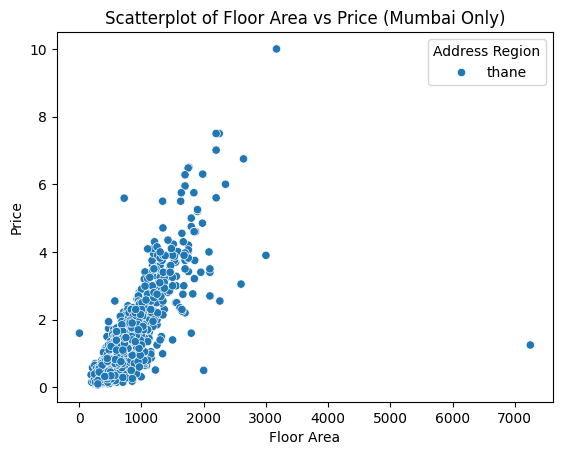

In [5521]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for 'mumbai'
filtered_df = df[df['addressregion'] == 'thane']

# Scatter plot for 'mumbai' only
sns.scatterplot(x=filtered_df['f_area'], y=filtered_df['f_price'], hue=filtered_df['addressregion'])

# Add labels and title
plt.xlabel('Floor Area')
plt.ylabel('Price')
plt.title('Scatterplot of Floor Area vs Price (Mumbai Only)')
plt.legend(title='Address Region')
plt.show()


# ameties

### Observation
- combine all 'am' columns together in list

In [5522]:
columns_with_am = [col for col in df.columns if col.startswith('am')]

In [5523]:
columns_with_am

['am_12204',
 'am_12226',
 'am_12225',
 'am_12229',
 'am_12230',
 'am_1404107',
 'am_12201',
 'am_12205',
 'am_12202',
 'am_12209',
 'am_12207',
 'am_12208',
 'am_12214',
 'am_12216',
 'am_12218',
 'am_1404110',
 'am_12224',
 'am_12206',
 'am_1404117',
 'am_1404105',
 'am_12220',
 'am_12228',
 'am_12203',
 'am_12211',
 'am_1404118',
 'am_1404106',
 'am_1404125',
 'am_1404124',
 'am_12538',
 'am_12540',
 'am_12219',
 'am_12227',
 'am_12523',
 'am_12533',
 'am_12534',
 'am_12535',
 'am_12536',
 'am_12537',
 'am_12539',
 'am_12543',
 'am_12545',
 'am_12581',
 'am_12583',
 'am_1404155',
 'am_1404114',
 'am_1404143',
 'am_1404109',
 'am_1404131',
 'am_12212',
 'am_1404112',
 'am_12217',
 'am_1404116',
 'am_1404120',
 'am_1404111',
 'am_12222',
 'am_1404115',
 'am_1404123',
 'am_1404127',
 'am_1404128',
 'am_1404129',
 'am_12223',
 'am_12215',
 'am_1404108',
 'am_12213',
 'am_12221',
 'am_1404130',
 'am_1404126',
 'am_1404113',
 'am_1404122',
 'am_12586',
 'am_1404156',
 'am_12525',
 'am_125

In [5524]:
# Combine values from columns that start with 'AM'
df['ameties'] = [list(values) for values in zip(*[df[col] for col in df.columns if col.startswith('am_')])]

In [5525]:
df['ameties'].head()

0                                                                                                                                                                                                                                            [club house, cafeteria/food court, bar/lounge, jogging and strolling track, outdoor tennis courts, barbeque pit, power back up, swimming pool, lift, security, park, reserved parking, service/goods lift, visitor parking, maintenance staff, bank & atm, banquet hall, gymnasium, indoor games room, aerobics room, laundry service, piped gas, rain water harvesting, water storage, indoor squash & badminton courts, arts & craft studio, multipurpose courts, meditation area, fingerprint access, premium branded fittings, waste disposal, conference room, mini cinema theatre, health club with steam / jaccuzi, located in the heart of city, large clubhouse, 3 tier security system, large open space, grand entrance lobby, multipurpose hall, solar energy, kids play area, 

In [5526]:
df['ameties'] = df['ameties'].apply(lambda x: [i for i in x if i is not None])

In [5527]:
df['ameties'].head()

0                                                                                                                                                                                                                                            [club house, cafeteria/food court, bar/lounge, jogging and strolling track, outdoor tennis courts, barbeque pit, power back up, swimming pool, lift, security, park, reserved parking, service/goods lift, visitor parking, maintenance staff, bank & atm, banquet hall, gymnasium, indoor games room, aerobics room, laundry service, piped gas, rain water harvesting, water storage, indoor squash & badminton courts, arts & craft studio, multipurpose courts, meditation area, fingerprint access, premium branded fittings, waste disposal, conference room, mini cinema theatre, health club with steam / jaccuzi, located in the heart of city, large clubhouse, 3 tier security system, large open space, grand entrance lobby, multipurpose hall, solar energy, kids play area, 

In [5528]:
# Drop columns
df = df.drop(['am_12204',
 'am_12226',
 'am_12225',
 'am_12229',
 'am_12230',
 'am_1404107',
 'am_12201',
 'am_12205',
 'am_12202',
 'am_12209',
 'am_12207',
 'am_12208',
 'am_12214',
 'am_12216',
 'am_12218',
 'am_1404110',
 'am_12224',
 'am_12206',
 'am_1404117',
 'am_1404105',
 'am_12220',
 'am_12228',
 'am_12203',
 'am_12211',
 'am_1404118',
 'am_1404106',
 'am_1404125',
 'am_1404124',
 'am_12538',
 'am_12540',
 'am_12219',
 'am_12227',
 'am_12523',
 'am_12533',
 'am_12534',
 'am_12535',
 'am_12536',
 'am_12537',
 'am_12539',
 'am_12543',
 'am_12545',
 'am_12581',
 'am_12583',
 'am_1404155',
 'am_1404114',
 'am_1404143',
 'am_1404109',
 'am_1404131',
 'am_12212',
 'am_1404112',
 'am_12217',
 'am_1404116',
 'am_1404120',
 'am_1404111',
 'am_12222',
 'am_1404115',
 'am_1404123',
 'am_1404127',
 'am_1404128',
 'am_1404129',
 'am_12223',
 'am_12215',
 'am_1404108',
 'am_12213',
 'am_12221',
 'am_1404130',
 'am_1404126',
 'am_1404113',
 'am_1404122',
 'am_12586',
 'am_1404156',
 'am_12525',
 'am_12547',
 'am_12577',
 'am_1404150',
 'am_1404148',
 'am_1404146',
 'am_12529',
 'am_12521',
 'am_12522',
 'am_12526',
 'am_12530',
 'am_12532',
 'am_12528',
 'am_12546',
 'am_1404161',
 'am_12234',
 'am_12585',
 'am_1404149',
 'am_1404152',
 'am_1404158',
 'am_1404157',
 'am_1404154',
 'am_12511',
 'am_12579',
 'am_12527',
 'am_12524',
 'am_12541',
 'am_12238',
 'am_12562',
 'am_12578',
 'am_12548',
 'am_12549',
 'am_12239',
 'am_1404151',
 'am_12236',
 'am_12237',
 'am_12556',
 'am_12560',
 'am_12555',
 'am_12561',
 'am_1404147',
 'am_12235',
 'am_12557',
 'am_12233',
 'am_12531',
 'am_12518',
 'am_12232',
 'am_12544',
 'am_12551',
 'am_12554',
 'am_12542',
 'am_12520',
 'am_12558',
 'am_12584',
 'am_1404160',
 'am_1404159',
 'am_12516',
 'am_12580',
 'am_12513',
 'am_12550',
 'am_12552',
 'am_12553'],axis=1)

In [5529]:
df.shape

(12011, 109)

# other columns 

### Observation
- combine 'educational institute' - 'educational institute_1','educational institute_2','educational institute_3','educational institute_4','educational institute_5'
- combine 'transportation hub' - 'transportation hub_1','transportation hub_2','transportation hub_3','transportation hub_4','transportation hub_5'
- combine 'shopping centre' - 'shopping centre_1','shopping centre_2','shopping centre_3','shopping centre_4','shopping centre_5'
- combine 'commercial hub_1','commercial hub_2','commercial hub_3','commercial hub_4','commercial hub_5'
- combine 'hospital_1','hospital_2','hospital_3','hospital_4','hospital_5'
- combine 'tourist spot_1','tourist spot_2','tourist spot_3','tourist spot_4'

In [5530]:
# Combine values
df['education'] = [list(values) for values in zip(df['educational institute_1'], df['educational institute_2'], df['educational institute_3'], df['educational institute_4'], df['educational institute_5'])]

In [5531]:
# Combine values
df['transport'] = [list(values) for values in zip(df['transportation hub_1'], df['transportation hub_2'], df['transportation hub_3'], df['transportation hub_4'], df['transportation hub_5'])]

In [5532]:
# Combine values
df['shopping_centre'] = [list(values) for values in zip(df['shopping centre_1'], df['shopping centre_2'], df['shopping centre_3'], df['shopping centre_4'], df['shopping centre_5'])]

In [5533]:
# Combine values
df['commercial_hub'] = [list(values) for values in zip(df['commercial hub_1'], df['commercial hub_2'], df['commercial hub_3'], df['commercial hub_4'], df['commercial hub_5'])]

In [5534]:
# Combine values
df['hospital'] = [list(values) for values in zip(df['hospital_1'], df['hospital_2'], df['hospital_3'], df['hospital_4'], df['hospital_5'])]

In [5535]:
# Combine values
df['tourist'] = [list(values) for values in zip(df['tourist spot_1'], df['tourist spot_2'], df['tourist spot_3'], df['tourist spot_4'])]

In [5536]:
# Drop columns
df = df.drop(['educational institute_1','educational institute_2','educational institute_3','educational institute_4','educational institute_5',
             'transportation hub_1','transportation hub_2','transportation hub_3','transportation hub_4','transportation hub_5',
             'shopping centre_1','shopping centre_2','shopping centre_3','shopping centre_4','shopping centre_5',
             'commercial hub_1','commercial hub_2','commercial hub_3','commercial hub_4','commercial hub_5',
             'hospital_1','hospital_2','hospital_3','hospital_4','hospital_5',
             'tourist spot_1','tourist spot_2','tourist spot_3','tourist spot_4'],axis=1)

In [5537]:
df.shape

(12011, 86)

In [5538]:
df = df.drop(['@id','@type','bhk_type' ,'locality_url','md_booking amount','md_loan offered','md_water availability','ap_price','ap_price per sqft','ap_configuration','ap_pjt_url','ap_ratings','ap_reviews_by','headings_with_ratings','aboutpjt_bhk','2 bhk flat','locality_url_review','liv_environment','liv_commuting','liv_places of interest','md_status of electricity','3 bhk flat','1 bhk flat','studio apartment','4 bhk flat','5 bhk flat','md_landmarks', 'multistorey apartment', '3 bhk villa', '4 bhk villa', 'residential plot', '2 bhk builder', '3 bhk builder','4 bhk penthouse','5 bhk penthouse', 'md_authority approval','6 bhk flat','rent','commercial office space','3 bhk penthouse','md_rera id','aboutpjt_launch date'],axis=1)

In [5539]:
df.shape

(12011, 44)

# Overlooking

### Observation
-  md_overlooking : rename

In [5540]:
df['md_overlooking'].value_counts()

md_overlooking
main road                       2268
garden/park, main road          1740
garden/park                     1544
garden/park, pool, main road    1425
garden/park, pool                393
pool, garden/park, main road     254
pool                             102
pool, main road                   60
main road, garden/park            59
pool, garden/park                 58
main road, garden/park, pool      55
garden/park, main road, pool       9
pool, main road, garden/park       7
main road, not available           2
main road, pool, garden/park       1
Name: count, dtype: int64

In [5541]:
df['md_overlooking'] = df['md_overlooking'].apply(
    lambda x: ', '.join(sorted(x.split(', '))) if pd.notna(x) else None
)

In [5542]:
df = df.rename(columns={'md_overlooking': 'overlooking'})

# room_type

### Observation
-make categories like flat and apartment from 'name' column 

In [5543]:
df['room_type'] = df['name'].apply(lambda x: 'flat' if 'flat' in x else ('apartment' if 'apartment' in x else 'other'))

In [5544]:
df['room_type'].value_counts()

room_type
flat         11902
apartment      109
Name: count, dtype: int64

In [5545]:
df = df.drop(['name'],axis=1)

In [5546]:
df.shape

(12011, 44)

# EMI

### Observation
- convert all emi values in lakh
- some values in 3 digit only means 700 rs so convert them also into thousand
- some values in lakh so convert then also into thousand 

In [5547]:
df['emi'].head()

0      81k
1    1.07l
2      81k
3      74k
4      57k
Name: emi, dtype: object

In [5548]:
df['emi'].dtype

dtype('O')

In [5549]:
converted_emi = []

for emi_n in df['emi']:
    if isinstance(emi_n, str):  # Check if emi_n is a string
        if 'k' in emi_n:
            # Convert from thousands to lakhs
            converted_emi.append(float(emi_n.replace('k', '')) / 100)
        elif 'l' in emi_n:
            # No change needed for lakhs
            converted_emi.append(float(emi_n.replace('l', '')))
        else:
            # Convert rupees to lakhs
            converted_emi.append(float(emi_n) / 100000)
    else:
        # If it's already a float, convert rupees to lakhs
        converted_emi.append(emi_n / 100000)

# Add the converted values to the DataFrame
df['converted_emi'] = converted_emi


In [5550]:
df = df.drop(['emi'],axis=1)

# project_in_acres

### Observation
- aboutpjt_project size : convert all in sqft

In [5551]:
df['aboutpjt_project size'].isna().sum()

np.int64(5854)

In [5552]:
df['aboutpjt_project size'].str.split(' ').str[1].value_counts()

aboutpjt_project size
acre       5527
sq-m        451
sq-ft       175
hectare       3
sq-yrd        1
Name: count, dtype: int64

In [5553]:
# Conversion function for different units to acres
def convert_to_acres(value):
    if isinstance(value, str):  # Check if the value is a string
        if 'acre' in value:
            acres = float(value.replace('acre', '').strip())
            return round(acres, 4)  
        elif 'sq-m' in value:
            sqm = float(value.replace('sq-m', '').strip())
            return round(sqm * 0.000247105, 4)  
        elif 'sq-ft' in value:
            sqft = float(value.replace('sq-ft', '').strip())
            return round(sqft * 0.0000229568, 4)  
        elif 'hectare' in value:
            hectares = float(value.replace('hectare', '').strip())
            return round(hectares * 2.47105, 4)  
        elif 'sq-yrd' in value:
            sq_yrd = float(value.replace('sq-yrd', '').strip())
            return round(sq_yrd * 0.000836127, 4)  
    elif isinstance(value, (int, float)):  # If value is numeric
        return round(value * 0.0000229568, 4)  
    return 0

# Apply the conversion to the column
df['project_in_acres'] = df['aboutpjt_project size'].apply(lambda x: convert_to_acres(x))


In [5554]:
df = df.drop(['aboutpjt_project size'],axis=1)

In [5555]:
df.isnull().sum()

id                        0
url                       0
image                   927
md_address                0
md_flooring            4524
image_urls             4349
available_units        5324
towers                 5132
locality_rank          3930
locality_url_rating     474
construction           1101
overlooking            4034
ownership              3670
extra_rooms            5392
bath                     43
parking                6335
builder                4372
project_name           3594
furnish                  45
f_price                   0
f_area                    5
f_costpersqft             6
property_type             3
status                   86
lift                   5535
flat_on_floor          2308
total_floor            2075
balcony                5911
facing                 3800
bed                     109
lattitude               474
longitude               474
seller                    0
addressregion             0
ameties                   0
education           

In [5556]:
df.shape

(12011, 44)

In [5557]:
#rename columns 
'md_address,md_flooring,f_price,f_area,f_costpersqft,converted_emi'
df = df.rename(columns={'md_address':'address','md_flooring':'flooring','f_price':'price','f_area':'area','f_costpersqft':'costpersqft','converted_emi':'emi','locality_url_rating':'locality_rating'})

In [5558]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12011 entries, 0 to 12021
Data columns (total 44 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                12011 non-null  object 
 1   url               12011 non-null  object 
 2   image             11084 non-null  object 
 3   address           12011 non-null  object 
 4   flooring          7487 non-null   object 
 5   image_urls        7662 non-null   object 
 6   available_units   6687 non-null   float64
 7   towers            6879 non-null   float64
 8   locality_rank     8081 non-null   float64
 9   locality_rating   11537 non-null  float64
 10  construction      10910 non-null  object 
 11  overlooking       7977 non-null   object 
 12  ownership         8341 non-null   object 
 13  extra_rooms       6619 non-null   object 
 14  bath              11968 non-null  float64
 15  parking           5676 non-null   float64
 16  builder           7639 non-null   object 
 17

In [5559]:
#missing value in percentage
missing_values_percentage = (df.isnull().sum() / len(df)) * 100
print("\nPercentage of missing values in each column:")
print(missing_values_percentage)


Percentage of missing values in each column:
id                   0.000000
url                  0.000000
image                7.717925
address              0.000000
flooring            37.665473
image_urls          36.208476
available_units     44.326034
towers              42.727500
locality_rank       32.720007
locality_rating      3.946382
construction         9.166597
overlooking         33.585880
ownership           30.555324
extra_rooms         44.892182
bath                 0.358005
parking             52.743319
builder             36.399967
project_name        29.922571
furnish              0.374657
price                0.000000
area                 0.041629
costpersqft          0.049954
property_type        0.024977
status               0.716010
lift                46.082757
flat_on_floor       19.215719
total_floor         17.275830
balcony             49.213221
facing              31.637665
bed                  0.907501
lattitude            3.946382
longitude            3.9

# flooring 

### Observation 
- 37% missing values 
- still I make feature engineering on that and I have make that using two different approach  
  - 1st Approach : Kmeans clustering 
    - using MultiLabelBinarizer create binary features
    - apply kmeans and find cluster
  - 2nd Approach : avg weightage for each flooring
    - assign weightage to each flooring according to the cost and quality of the material
    - cal sum of weightage for each data points 

In [5560]:
df['flooring'].dtype

dtype('O')

In [5561]:
df['flooring'].value_counts()

flooring
vitrified                                                                                         3705
marble                                                                                             693
ceramic tiles                                                                                      332
vitrified, wooden                                                                                  168
granite, vitrified                                                                                 134
marble, vitrified                                                                                  129
ceramic tiles, vitrified                                                                           113
vitrified, marble, granite                                                                          95
vitrified, ceramic tiles                                                                            94
ceramic tiles, granite, vitrified                               

In [5562]:
df['flooring'].isnull().sum()


np.int64(4524)

In [5563]:
df['flooring'] = df['flooring'].fillna('unknown')

In [5564]:
# Split the 'flooring' column into individual values, flatten the list, and find unique values
unique_floorings = set(floor.strip() for floors in df['flooring'] for floor in floors.split(','))

# Convert to a sorted list for better readability
unique_floorings = sorted(unique_floorings)

# Display the result
print(unique_floorings)

['ceramic tiles', 'granite', 'marble', 'marbonite', 'mosaic', 'normal tiles/kotah stone', 'unknown', 'vitrified', 'wooden']


In [5565]:
from sklearn.preprocessing import MultiLabelBinarizer

# Split flooring combinations into individual materials
df['flooring_split'] = df['flooring'].str.split(', ')

# Use MultiLabelBinarizer to create binary features
mlb = MultiLabelBinarizer()
flooring_matrix = mlb.fit_transform(df['flooring_split'])

# Create a DataFrame for encoded flooring data
flooring_encoded = pd.DataFrame(flooring_matrix, columns=mlb.classes_)


In [5566]:
flooring_encoded.head(5)

,ceramic tiles,granite,marble,marbonite,mosaic,normal tiles/kotah stone,unknown,vitrified,wooden
0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,1
2,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0


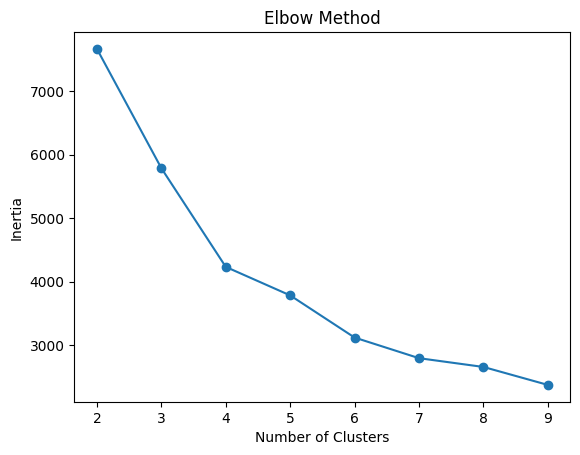

In [5567]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Find the optimal number of clusters (Elbow Method)
inertia = []
range_n_clusters = range(2, 10)
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(flooring_encoded)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.plot(range_n_clusters, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# Use the chosen number of clusters
kmeans = KMeans(n_clusters=4, random_state=42)
df['flooring_cluster'] = kmeans.fit_predict(flooring_encoded)


In [5568]:
df['flooring_cluster'].value_counts()

flooring_cluster
1    4621
0    4524
3    2241
2     625
Name: count, dtype: int64

### Observation
 - 0 is for unknown values only 

In [5569]:
df[['flooring','flooring_cluster']].head()

,flooring,flooring_cluster
0,vitrified,1
1,"vitrified, wooden, ceramic tiles",1
2,unknown,0
3,vitrified,1
4,vitrified,1


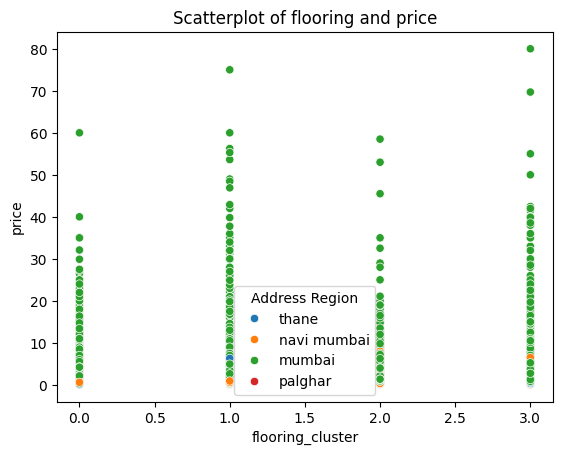

In [5570]:
# Filter data for 'mumbai'
#filtered_df = df[df['addressregion'] == 'thane']

sns.scatterplot(x=df['flooring_cluster'], y=df['price'], hue=df['addressregion'])

# Add labels and title
plt.xlabel('flooring_cluster')
plt.ylabel('price')
plt.title('Scatterplot of flooring and price')
plt.legend(title='Address Region')
plt.show()

##### Observation 
- 

In [5571]:
# Define the weightage for each flooring type
weightages = {
    "vitrified": 9,
    "marble": 8,
    "ceramic tiles": 7,
    "wooden": 8,
    "granite": 9,
    "mosaic": 6,
    "normal tiles/kotah stone": 5,
    "marbonite": 8
}


# Function to calculate the combination score
def calculate_combination_score(flooring_combination):
    flooring_types = [f.strip().lower() for f in flooring_combination.split(",")]
    total_weight = sum(weightages.get(f, 0) for f in flooring_types)
    #combination_score = total_weight / len(flooring_types)
    return round(total_weight, 2)

# Apply the function to the dataframe
df["combination_score"] = df["flooring"].apply(calculate_combination_score)

In [5572]:
df["combination_score"].value_counts()

combination_score
0     4524
9     3784
8      759
17     488
16     378
7      332
25     230
24     183
18     183
26     176
60     134
15      85
33      80
32      66
5       64
30      52
41      39
34      37
22      37
6       33
23      31
52      31
31      30
46      28
21      27
14      26
54      22
38      20
13      15
39      11
45      10
49       9
47       9
29       9
43       8
40       8
55       8
28       7
37       5
20       5
44       5
36       4
27       4
12       4
35       3
51       3
42       2
48       1
19       1
11       1
Name: count, dtype: int64

In [5573]:
df['combination_score'].head()

0     9
1    24
2     0
3     9
4     9
Name: combination_score, dtype: int64

<Axes: xlabel='price', ylabel='Count'>

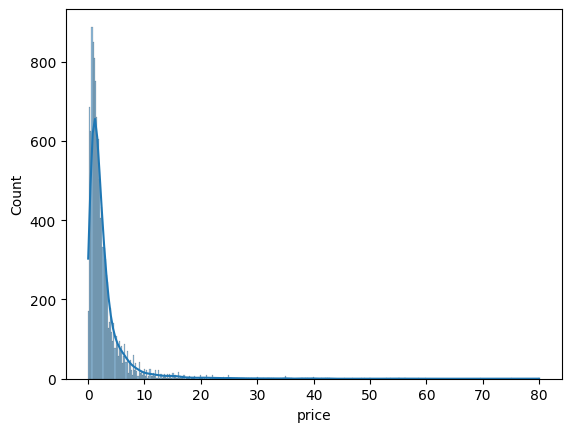

In [5574]:
sns.histplot(df['price'], kde=True) 

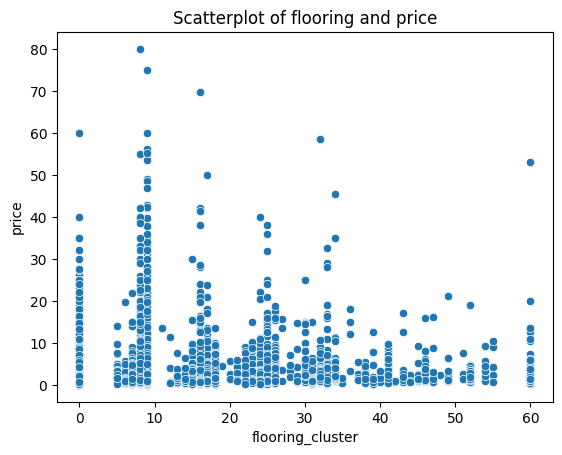

In [5575]:
# Filter data for 'mumbai'
#filtered_df = df[df['addressregion'] == 'thane']

sns.scatterplot(x=df['combination_score'], y=df['price'])

# Add labels and title
plt.xlabel('flooring_cluster')
plt.ylabel('price')
plt.title('Scatterplot of flooring and price')
#plt.legend(title='Address Region')
plt.show()

In [5576]:
df.to_csv('mg_cleaned_dataset.csv',index=False)

# fetch area from url column 

once work done delete this below

In [5577]:
df['area_from_url'] = df['url'].apply(lambda x: int(re.search(r'(\d+)-sq', x).group(1)) if re.search(r'(\d+)-sq', x) else None)

In [5578]:
#all values in sqft only 
df['area_from_url'].head()

0     635.0
1    1905.0
2     623.0
3     702.0
4     608.0
Name: area_from_url, dtype: float64

In [5579]:
df[df['area_from_url'].isna()]['id']

535     cardid67005273
2092    cardid70787281
4753    cardid69337447
6574    cardid71710057
6976    cardid72908977
Name: id, dtype: object

In [5580]:
df['area'].head()

0     635.0
1    1905.0
2     623.0
3     702.0
4     608.0
Name: area, dtype: object

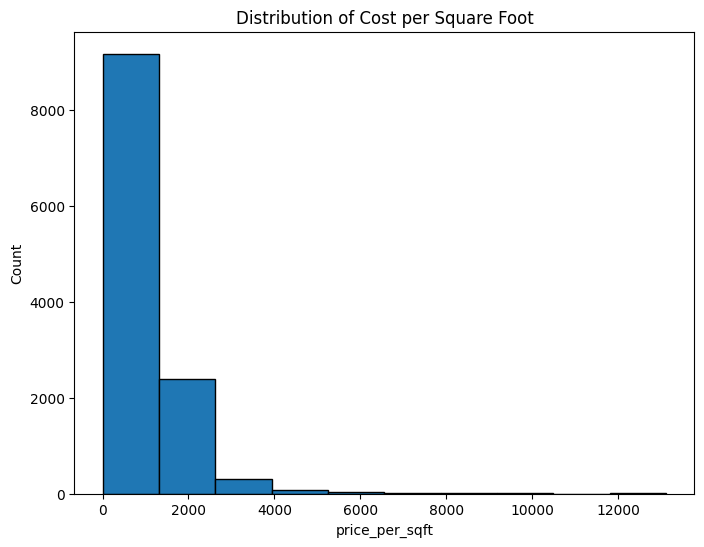

In [5581]:
import matplotlib.pyplot as plt
import pandas as pd

# Example: Replace `costpersqft` with your column
plt.figure(figsize=(8, 6))
df['area_from_url'].plot(kind='hist', bins=10, edgecolor='black')

# Set standard x-axis format
plt.ticklabel_format(style='plain', axis='x')

# Add labels and title
plt.xlabel('price_per_sqft')
plt.ylabel('Count')
plt.title('Distribution of Cost per Square Foot')

plt.show()


In [5582]:
df['area_difference'] = df['area'] - df['area_from_url']

In [5583]:
area_d = df[['id','url','address','bed','price','costpersqft','area','area_from_url','area_difference']]

area_d.to_excel('chk_area_d.xlsx')